In [85]:
import numpy as np # 행렬 연산 패키지
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font_path ='/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns #데이터 시각화(추세 등) 패키지
from sklearn.preprocessing import scale, minmax_scale, robust_scale #Scaling클래스
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt



In [64]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [59]:
df_raw = pd.read_csv("/home/pirl/Downloads/체질검사.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [60]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT", axis=1, inplace=False)#목표변수, 설명변수 지정

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (176, 13)
train data y size: (176,)
test data x size: (76, 13)
test data y size: (76,)


In [72]:
lr_model=smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())
#의사결정트리 생성
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4)
dt_model.fit(df_train_x, df_train_y)
#랜덤포레스트 생성
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6, min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)
#그래디언트 부스팅 생성
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        10:41:04   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=11, min_samples_split=22,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"] #모델 리스트, 그래프를 그리기 생성 목적
mse, rmse, mae, mape = [],[],[],[] #평가 리스트 초기화

In [74]:
#회귀분석
lr_y_pred = lr_result.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [76]:
#의사결정나무
dt_y_pred = dt_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [78]:
#회귀분석
rf_y_pred = rf_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [79]:
#그래디언트 부스팅
gb_y_pred = gb_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

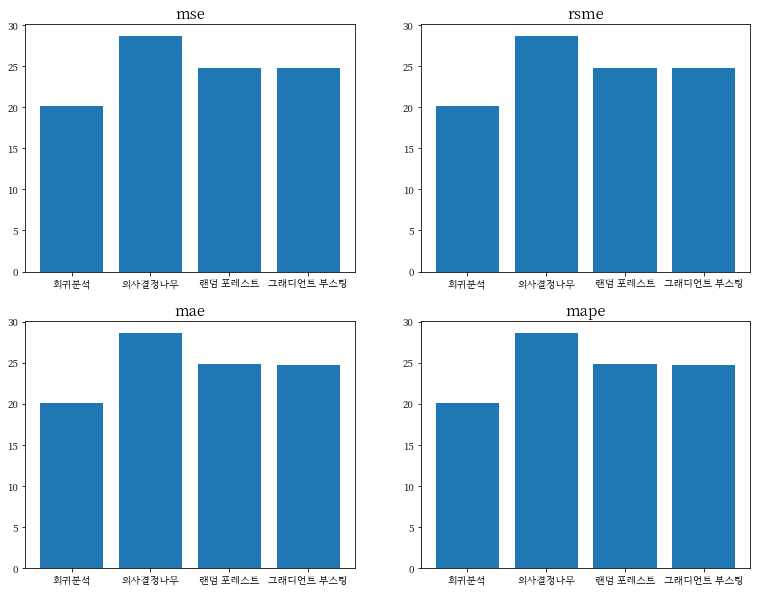

In [86]:
fig, ax = plt.subplots(2,2, figsize = (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, mse)
ax[0,1].set_title("rsme").set_fontsize(15)

ax[1,0].bar(models, mse)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mse)
ax[1,1].set_title("mape").set_fontsize(15)

In [ ]:
ax